## Import lib

In [ ]:
!pip install tellurium

In [ ]:
import tellurium as te

## Equation and parameters

### Konversi arabinose oleh L-AI (L-Arabinose isomerase)

L-AI expression using weak anderson promoter J23106
$$
\frac{d}{dt}[A_i]= \alpha - \gamma_{A_i}[A_i]\\
\alpha = \frac{k_1k_0}{\delta_m}
$$

In [ ]:
#@markdown $A_i =$ L-AI (initial concentration) <br>
Ai =  1e-3#@param {type:"number"}
#@markdown $\gamma_{A_i} =$ L-AI decay rate
y_Ai =  1.7e-3#@param {type:"number"}
#@markdown $k_0 =$ L-AI mRNA translation rate
k_tl_Ai =  1e-2#@param {type:"number"}
#@markdown $k_1 =$ L-AI population-averaged transcription rate
k_tc_Ai =  9e-5#@param {type:"number"}
#@markdown $\delta_m =$ L-AI mRNA decay rate
y_m_Ai =  1.7e-3#@param {type:"number"}


L-arabinose -> ribulose reaction by L-AI
$$
A_i + A_1 \rightarrow^{k_f} A_iA_1 \\
A_iA_1 \rightarrow^{k_r} A_i + A_1 \\
A_iA_1 \rightarrow^{k_{cat}} A_i + R \\
$$

In [ ]:
#@markdown $A_1 =$ L-Arabinose inside cell (initial concentration)<br>
A1 =  1e-5#@param {type:"number"}
# #@markdown $A_iA_1 =$ L-Arabinose-L-Arabinose isomerase complex (initial concentration)<br>
# AiA1 = 0 #@param {type:"number"}
# #@markdown $R =$ L-Ribulose (initial concentration)<br>
# R = 0 #@param {type:"number"}
#@markdown $k_f =$  forward reaction rate (pembentukan EA1)
k_f_AiA1 = 0.00012 #@param {type:"number"}
#@markdown $k_r =$  reverse reaction rate (pemecahan EA1)
k_r_AiA1 = 0.0000012 #@param {type:"number"}
#@markdown $k_{cat} =$  catalytic rate (pemecahan EA1 menjadi R)
k_cat_R =  8.167#@param {type:"number"}


### Produksi HCN dengan adanya insert arabinose regulated hcnABC operone 

Transcription Factor Complex formation (Arabinose-AraC complex)
$$
A_0 \rightarrow^{k_{diff}} A_1 \\
A_1 \rightarrow^\gamma \emptyset \\
A_1 + AraC \rightarrow^{k_f} A_1.AraC \\
A_1.AraC \rightarrow^{k_r} A_1 + AraC
$$

In [ ]:
#@markdown $A_0 =$ L-Arabinose outside cell (initial concentration) <br>
A0 =  200#@param {type:"number"} #Units= Molar
#@markdown $AraC =$ Total AraC (constan)<br>
AraCTotal =  1e-8#@param {type:"number"}
#@markdown $A_1AraC =$ Arabinose-AraC complex (initial concentration)<br>
A1AraC = 1e-8 #@param {type:"number"} #Units: Molar
#@markdown $k_{diff} =$ L-Arabinose diffusion rate (transisi Arabinose ke dalam cell)
k_diff_A = 7e-18 #@param {type:"number"} #Units:Mole/cell/30 minute
#@markdown $k_f =$  forward reaction rate (pembentukan $A_1.AraC$)
k_f_A1AraC =  1.2e-4#@param {type:"number"} #Units: s^-1
#@markdown $k_r =$  reverse reaction rate (pemecahan $A_1.AraC$)
k_r_A1AraC =  1.2e-4#@param {type:"number"} #Units:s^-1
#@markdown $\gamma =$ L-Arabinose inside cell decay rate
y_A1 =  3.46e-5#@param {type:"number"} #Units: s^-1


HCN synthase formation (using $A_1.AraC$ complex)
$$
\frac{d}{dt}[HCN_{cell}]= \alpha_0 + \alpha\frac{[A_1.AraC]^n}{K_m^n + [A_1.AraC]^n} - \gamma[HCN_{cell}]\\
$$
HCN synthase formation (using $CviR.AHL$ complex)
$$
\frac{d}{dt}[HCN_{cell}]= \beta_0 + \beta\frac{[CviR.AHL]^n}{K_q^n + [CviR.AHL]^n} - \gamma[HCN_{cell}]\\
$$
HCN synthase formation (using both)
$$
\frac{d}{dt}[HCN_{cell}]= \alpha_0 + \alpha\frac{[A_1.AraC]^n}{K_m^n + [A_1.AraC]^n} + \beta_0 + \beta\frac{[CviR.AHL]^n}{K_q^n + [CviR.AHL]^n} - \gamma[HCN_{cell}]\\
$$

In [ ]:
#@markdown $HCN_{cell} =$ HCN synthase intracellular (initial concentration) <br>
HCN_cell =  1e-3#@param {type:"number"} #Units: M
#@markdown $\alpha =$ maximal transcription rate (using $A_1.AraC$) <br>
a =  10#@param {type:"number"}
#@markdown $\beta =$ maximal transcription rate (using $CviR.AHL$) <br>
b =  1e-2#@param {type:"number"}
#@markdown $\alpha_0 =$ basal transcription (using $A_1.AraC$) <br>
a0 = 0.01 #@param {type:"number"}
#@markdown $\beta_0 =$ basal transcription (using $CviR.AHL$) <br>
b0 = 0.01 #@param {type:"number"}
#@markdown $n =$ hill coefficient <br>
n =  2.26#@param {type:"number"}
#@markdown $K_m = A_1.AraC$ complex concentration occupying half of the binding sites <br>
K_m =  1e-9#@param {type:"number"}
#@markdown $K_q = CviR.AHL$ complex concentration occupying half of the binding sites <br>
K_q =  1e-9#@param {type:"number"}
#@markdown $\gamma =$ HCN synthase decay rate
y_HCN_cell =  5.6e-5#@param {type:"number"}

HCN syntase transition
$$
HCN_{cell}\;\;\;{}_{k_{off}}\rightleftharpoons^{k_{on}} \;\; HCN_{memb}
$$

In [ ]:
#@markdown $HCN_{memb} =$ HCN synthase membran (initial concentration) <br>
HCN_memb =  1e-3#@param {type:"number"}
#@markdown $k_{on} =$ HCN syntase activation rate <br>
k_on_HCN =  9e-3#@param {type:"number"}
#@markdown $k_{off} =$ HCN syntase inactivation rate <br>
k_off_HCN =  1e-8#@param {type:"number"}

HCN Production
$$
HCN_{memb} + G \rightarrow^{k_{f_1}} C_1 \\
C_1 \rightarrow^{k_{r_1}} HCN_{memb} + G \\
C_1 + 2Ac \rightarrow^{k_{f_2}} C_2 \\
C_2 \rightarrow^{k_{r_2}} C_1 + 2Ac \\
C_2 \rightarrow^{k_h} HCN + CO_2 + 2AcH_2 + HCN_{memb} \\
$$

In [ ]:
#@markdown $ G=$ Glycine (initial concentration) <br>
G =  1e-3#@param {type:"number"}
#@markdown $C_1 = E_{Memb}$-Glycine complex (initial concentration) <br>
C1 =  1e-3#@param {type:"number"}
#@markdown $C_2 = C_1$-Acceptors complex (initial concentration) <br>
C2 =  1e-3#@param {type:"number"}
#@markdown $ Ac=$ Acceptors (initial concentration) <br>
Ac =  1e-5#@param {type:"number"}
#@markdown $ k_{f_1}=$ forward reaction rate (pembentukan $C_1$) <br>
k_f_C1 =  1e-8#@param {type:"number"}
#@markdown $ k_{f_2}=$ forward reaction rate (pembentukan $C_2$) <br>
k_f_C2 =  1e-8#@param {type:"number"}
#@markdown $ k_{r_1}=$ reverse reaction rate (pemecahan $C_1$) <br>
k_r_C1 =  1e-8#@param {type:"number"}
#@markdown $ k_{r_2}=$ reverse reaction rate (pemecahan $C_2$) <br>
k_r_C2 =  1e-8#@param {type:"number"}
#@markdown $ k_h=$ HCN creation rate <br>
k_h =  9e-3#@param {type:"number"}


### Degradasi HCN oleh rhodanese, regulasi oleh arabinose & TetR

Rhodanese formation
$$
\frac{d}{dt}[Rho]= \theta_0 + \theta\frac{K_r^n}{K_r^n + [TetR_2]^n} - \gamma[Rho]\\
$$
Because $[TetR_2]=0$, then
$$
\frac{d}{dt}[Rho]= \theta_0 + \theta - \gamma[Rho]\\
$$
Rhodanese production active when Arabinose ($A_1$) concentration is below $\rho$

In [ ]:
#@markdown $Rho =$ Rhodanese (initial concentration) <br>
Rho =  1e-3#@param {type:"number"}
#@markdown $\rho =$ maximum value of $A_1$ to trigger rhodanese<br>
p =  5e-6#@param {type:"number"}
#@markdown $\theta =$ maximal transcription rate <br>
t =  1e-2#@param {type:"number"}
#@markdown $\theta_0 =$ basal transcription <br>
t0 =  1e-2#@param {type:"number"}
#@markdown $\gamma =$ Rhodanese decay rate
y_Rho =  5.6e-5#@param {type:"number"}


HCN Degradation
$$
HCN \rightarrow H + CN \\
Rho + S_2O_3 \rightarrow^{k_f} RhoS_2O_3 \\
RhoS_2O_3 \rightarrow^{k_r} Rho + S_2O_3 \\
RhoS_2O_3 \rightarrow^{k_x} RhoS + SO_3 \\
RhoS + CN \rightarrow^{k_y} Rho + SCN \\
$$

In [ ]:
#@markdown $S_2O_3$ (initial concentration) <br>
S2O3 =  1e-3#@param {type:"number"}
#@markdown $ k_f=$ forward reaction rate (pembentukan Rhodanese-$S_2O_3$) <br>
k_f_Rho =   0.48#@param {type:"number"}
#@markdown $ k_r=$ reverse reaction rate (pemecahan Rhodanese-$S_2O_3$) <br>
k_r_Rho =  1.6e-3#@param {type:"number"}
#@markdown $ k_x=$ forward reaction rate (pembentukan $RhoS + SO_3$) <br>
k_x =   1.3e-2#@param {type:"number"}
#@markdown $ k_y=$ forward reaction rate (pembentukan SCN) <br>
k_y =   0.055#@param {type:"number"}

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4583035/ 

## Modelling

In [ ]:
raw_model = f'''
// Transcription Translation process
// d/dt [E] = a - y[E]
model formation_reaction(E, a, y)
  J0:   -> E ; a     ;
  J1: E ->   ; y * E ;
end

// Michaelis-menten equation
// E + S <-> ES -> E + P
model michaelis_menten_reaction(E, S, kf, kr, kcat)
  J0: E + S -> ES     ; kf * E * S ;
  J1: ES    -> E + S  ; kr * ES    ;
  J2: ES    -> E + P  ; kcat * ES  ;
  ES = 0;
  P  = 0;
end

// A1AraC complex (diffusion)
model arabinose_arac_diffusion(A0, A1, A1AraC, AraCTotal, kdiff, kf, kr, y)
  J1: A0         -> A1         ; kdiff * (A0 - A1)                 ;
  J2: A1         ->            ; y * A1                            ;
  J3: A1 + AraC  -> A1AraC     ; kf * A1 * (AraCTotal - A1AraC)    ;
  J4: A1AraC     -> A1 + AraC  ; kr * A1AraC                       ;
  AraC = AraCTotal - A1AraC;
end

// Intracell-membran transition
model intracell_membran_transition(Ec, Em, kon, koff)
  J1: Ec -> Em ; kon * Ec  ;
  J2: Em -> Ec ; koff * Em ;
end

// HCN production
model hcn_production(E, G, C1, C2, Ac, HCN, kf1, kr1, kf2, kr2, kh)
  J1: E + G    -> C1                    ; kf1 * E * G     ;
  J2: C1       -> E + G                 ; kr1 * C1        ;
  J3: C1 + 2Ac -> C2                    ; kf2 * C1 * Ac^2 ;
  J4: C2       -> C1 + 2Ac              ; kr2 * C2        ;
  J5: C2       -> HCN + CO2 + 2AcH2 + E ; kh * C2         ;
  CO2  = 0;
  AcH2 = 0;
end

// HCN degradation
model hcn_degradation(E, S1, CN, k1, k2, k3, k4)
  J1: E + S1   -> ES1        ; k1 * E * S1   ;
  J2: ES1      -> E + S1     ; k2 * ES1      ;
  J3: ES1      -> ES2 + $SO3 ; k3 * ES1      ;
  J4: ES2 + CN -> E + $SCN   ; k4 * ES2 * CN ;
  ES1 = 0;
  ES2 = 0;
  SO3 = 0;
  SCN = 0;
end

// Full reaction
model full_reaction
  // ---------------------------- Species ---------------------------------------------

  species Ai, A1;
  species A0, A1AraC;
  species HCNc, HCNm;
  species G, C1, C2, Ac, HCN;
  species Rho, S2O3;

  //---------------------------- Reactions --------------------------------------------

  J_F_Ai       : formation_reaction(Ai, alpha_Ai, yAi);
  J_MM_R       : michaelis_menten_reaction(Ai, A1, kf0, kr0, kcat);
  J_Diff       : arabinose_arac_diffusion(A0, A1, A1AraC, AraCTotal, kdiff, kf1, kr1, yA1);
  
  J_F_HCNc_ara : formation_reaction(HCNc, alpha_arac, yHCN); //
  # J_F_HCNc_cvi : formation_reaction(HCNc, alpha_cvir, yHCN); // Pilih salah satu
  # J_F_HCNc_all : formation_reaction(HCNc, alpha_both, yHCN); //

  J_IM_HCN     : intracell_membran_transition(HCNc, HCNm, kon, koff);
  J_HCN        : hcn_production(HCNm, G, C1, C2, Ac, HCN, kf2, kr2, kf3, kr3, kh);

  J_F_Rho      : formation_reaction(Rho, alpha_rho, yRho);
  J_HCN_D      : hcn_degradation(Rho, S2O3, HCN, kf4, kr4, kx, ky)

  //------------------------------- Event --------------------------------------------

  E0 : at (A1 < {p}) : alpha_rho = {t0} + {t};

  // ----------------------------- Values ---------------------------------------------

  Ai       = {Ai};
  yAi      = {y_Ai};
  alpha_Ai = {k_tl_Ai} * {k_tc_Ai} / {y_m_Ai};

  A1 = {A1}        ;
  kf0 = {k_f_AiA1} ; kr0 = {k_r_AiA1} ; kcat = {k_cat_R} ;

  A0 = {A0}          ; AraCTotal = {AraCTotal} ; A1AraC = {A1AraC}  ;
  kdiff = {k_diff_A} ; kf1 = {k_f_A1AraC}      ; kr1 = {k_r_A1AraC} ;
  yA1 = {y_A1}       ;

  HCNc = {HCN_cell};
  CviR = 0;
  a = {a}; a0 = {a0}; Km = {K_m}; n0 = {n};
  b = {b}; b0 = {b0}; Kq = {K_q}; n1 = {n};
  alpha_arac := a0 + a * A1AraC^n0 / (Km^n0 + A1AraC^n0);
  alpha_cvir := b0 + b * CviR^n1 / (Kq^n1 + CviR^n1);
  alpha_both := alpha_arac + alpha_cvir;
  yHCN = {y_HCN_cell};

  HCNm = {HCN_memb};
  kon = {k_on_HCN}; koff = {k_off_HCN};

  HCN = 0        ;
  G = {G}        ; Ac = {Ac}      ;
  C1 = {C1}      ; C2 = {C2}      ; 
  kf2 = {k_f_C1} ; kr2 = {k_r_C1} ;
  kf3 = {k_f_C2} ; kr3 = {k_r_C2} ;
  kh = {k_h}     ;

  p = {p}; Rho = {Rho};
  t = {t}; t0 = {t0};
  _a = t0 + t; alpha_rho = 0;
  yRho = {y_Rho};
    
  S2O3 = {S2O3}   ;
  kf4 = {k_f_Rho} ; kr4 = {k_r_Rho} ;
  kx  = {k_x}     ; ky = {k_y}      ;

end
'''

model = te.loada(raw_model)

In [ ]:
time_end =  14400 #@param {type:"integer"}
time_step =  14400 #@param {type:"integer"}
# model.reset()

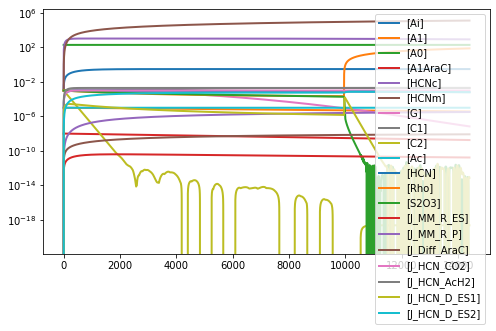

In [ ]:
res = model.simulate(0, time_end, time_step)
model.plot(figsize=(8,4.5), logy=True)
model.reset()

In [ ]:
x = res[:, res.colnames.index('time')]
A1 = res[:, res.colnames.index('[A1]')]
Rho = res[:, res.colnames.index('[Rho]')]
HCN = res[:, res.colnames.index('[HCN]')]

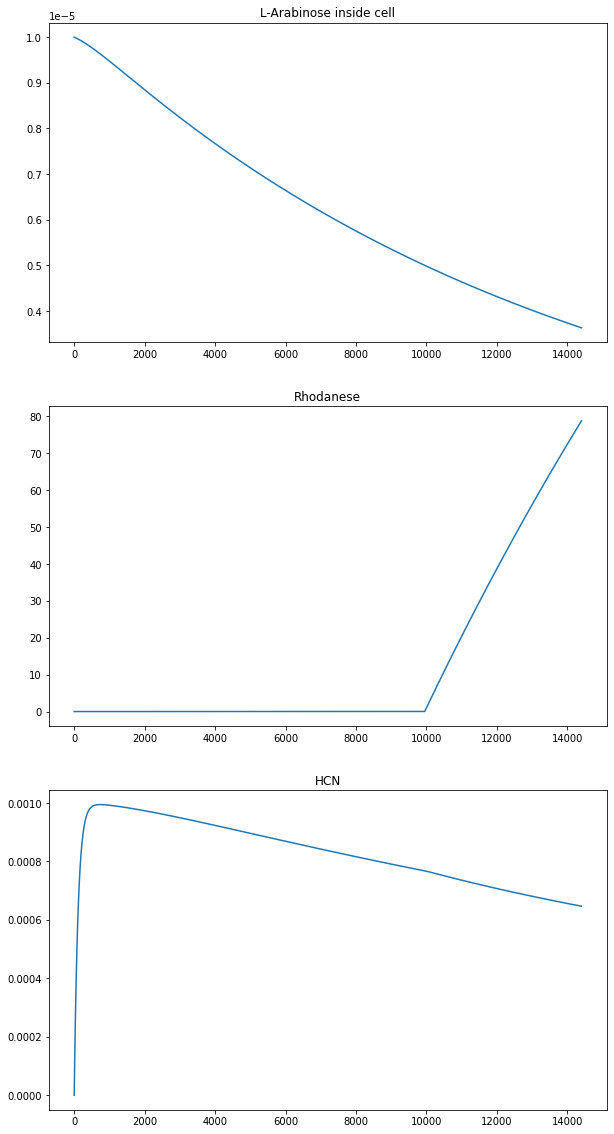

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_size_inches(10, 20)
ax1.set_title('L-Arabinose inside cell')
ax1.plot(x, A1)

ax2.set_title('Rhodanese')
ax2.plot(x, Rho)

ax3.set_title('HCN')
ax3.plot(x, HCN)

plt.savefig('modelling_v1.png')
plt.show()

**Inspect per Parts**



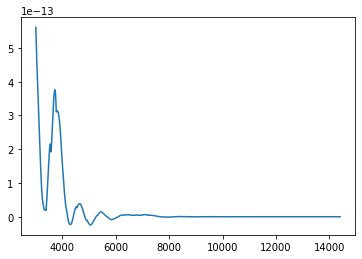

In [ ]:
x = res[:, res.colnames.index('time')]
y = res[:, res.colnames.index('[C2]')]

plt.plot(x[3000:], y[3000:])
# plt.yscale("log")
plt.show()